In [236]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## BPI Challenge 2012


In [207]:
train_default = pd.read_csv('BPI_Challenge_2012-training.csv')
test_default = pd.read_csv('BPI_Challenge_2012-test.csv')
merged_dataset = pd.concat([train_default,test_default])
merged_dataset.dtypes

eventID                        int64
case concept:name              int64
case REG_DATE                 object
case AMOUNT_REQ                int64
event concept:name            object
event lifecycle:transition    object
event time:timestamp          object
dtype: object

In [208]:
#merged_dataset['event time:timestamp'] = pd.to_datetime(merged_dataset['event time:timestamp'], format='%Y%m%d', errors='ignore')

#sorted_data = merged_dataset.sort_values(by=[ 'event time:timestamp'])

merged_dataset['event time:timestamp'] =pd.to_datetime(merged_dataset['event time:timestamp'], dayfirst=True)
sorted_dataset = merged_dataset.sort_values('event time:timestamp').reset_index(drop=True)
training_data = sorted_dataset[0:183613]
test_data = sorted_dataset[183614:]
s1 = pd.merge(training_data, test_data, how='inner', on=['case concept:name'])

training_data_mask = training_data['case concept:name'].isin(s1['case concept:name'])
training_data_fil = training_data[~training_data_mask]
#training_data_fil

test_data_mask = test_data['case concept:name'].isin(s1['case concept:name'])
test_data_fil = test_data[~test_data_mask]
#test_data_fil

s2 = pd.merge(training_data_fil, test_data_fil, how='inner', on=['case concept:name'])

final_train = training_data_fil.sort_values(by=[ 'case concept:name','event time:timestamp'])
final_test = test_data_fil.sort_values(by=[ 'case concept:name','event time:timestamp'])

In [302]:
s1

,eventID _x,case concept:name,event concept:name_x,event lifecycle:transition_x,event time:timestamp_x,eventID _y,event concept:name_y,event lifecycle:transition_y,event time:timestamp_y


In [212]:
training_data = sorted_dataset[0:183613]
test_data = sorted_dataset[183614:]
training_data

,eventID,case concept:name,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp
0,0,173688,2011-10-01T00:38:44.546+02:00,20000,A_SUBMITTED,COMPLETE,2011-10-01 00:38:44.546
1,1,173688,2011-10-01T00:38:44.546+02:00,20000,A_PARTLYSUBMITTED,COMPLETE,2011-10-01 00:38:44.880
2,2,173688,2011-10-01T00:38:44.546+02:00,20000,A_PREACCEPTED,COMPLETE,2011-10-01 00:39:37.906
3,3,173688,2011-10-01T00:38:44.546+02:00,20000,W_Completeren aanvraag,SCHEDULE,2011-10-01 00:39:38.875
4,4294967296,173691,2011-10-01T08:08:58.256+02:00,5000,A_SUBMITTED,COMPLETE,2011-10-01 08:08:58.256
5,4294967297,173691,2011-10-01T08:08:58.256+02:00,5000,A_PARTLYSUBMITTED,COMPLETE,2011-10-01 08:09:02.195
6,4294967298,173691,2011-10-01T08:08:58.256+02:00,5000,A_PREACCEPTED,COMPLETE,2011-10-01 08:09:56.648
7,4294967299,173691,2011-10-01T08:08:58.256+02:00,5000,W_Completeren aanvraag,SCHEDULE,2011-10-01 08:09:59.578
8,8589934592,173694,2011-10-01T08:10:30.287+02:00,7000,A_SUBMITTED,COMPLETE,2011-10-01 08:10:30.287
9,8589934593,173694,2011-10-01T08:10:30.287+02:00,7000,A_PARTLYSUBMITTED,COMPLETE,2011-10-01 08:10:30.591


In [213]:
test_data

,eventID,case concept:name,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp
183614,41901700939786,204090,2012-01-25T23:17:08.263+01:00,18110,W_Completeren aanvraag,COMPLETE,2012-01-26 11:27:02.366
183615,39986145525777,202710,2012-01-20T20:50:07.517+01:00,25000,W_Nabellen offertes,START,2012-01-26 11:27:08.233
183616,39986145525778,202710,2012-01-20T20:50:07.517+01:00,25000,O_SENT_BACK,COMPLETE,2012-01-26 11:27:20.594
183617,39986145525779,202710,2012-01-20T20:50:07.517+01:00,25000,W_Valideren aanvraag,SCHEDULE,2012-01-26 11:27:21.123
183618,31413390802989,196482,2011-12-29T16:50:36.898+01:00,5000,W_Nabellen incomplete dossiers,SCHEDULE,2012-01-26 11:27:21.369
183619,39986145525780,202710,2012-01-20T20:50:07.517+01:00,25000,W_Nabellen offertes,COMPLETE,2012-01-26 11:27:23.454
183620,31413390802990,196482,2011-12-29T16:50:36.898+01:00,5000,W_Valideren aanvraag,COMPLETE,2012-01-26 11:27:24.005
183621,36846524432411,200392,2012-01-12T20:57:31.899+01:00,50000,W_Nabellen offertes,COMPLETE,2012-01-26 11:27:36.491
183622,31413390802991,196482,2011-12-29T16:50:36.898+01:00,5000,W_Nabellen incomplete dossiers,START,2012-01-26 11:27:39.113
183623,41863046234124,204063,2012-01-25T21:29:13.126+01:00,12000,W_Completeren aanvraag,START,2012-01-26 11:27:43.743


In [214]:
s1 = pd.merge(training_data, test_data, how='inner', on=['case concept:name'])

training_data_mask = training_data['case concept:name'].isin(s1['case concept:name'])
training_data_fil = training_data[~training_data_mask]
#training_data_fil

test_data_mask = test_data['case concept:name'].isin(s1['case concept:name'])
test_data_fil = test_data[~test_data_mask]
#test_data_fil

s2 = pd.merge(training_data_fil, test_data_fil, how='inner', on=['case concept:name'])

final_train = training_data_fil.sort_values(by=[ 'case concept:name','event time:timestamp'])
final_test = test_data_fil.sort_values(by=[ 'case concept:name','event time:timestamp'])

In [215]:
final_train

,eventID,case concept:name,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp
0,0,173688,2011-10-01T00:38:44.546+02:00,20000,A_SUBMITTED,COMPLETE,2011-10-01 00:38:44.546
1,1,173688,2011-10-01T00:38:44.546+02:00,20000,A_PARTLYSUBMITTED,COMPLETE,2011-10-01 00:38:44.880
2,2,173688,2011-10-01T00:38:44.546+02:00,20000,A_PREACCEPTED,COMPLETE,2011-10-01 00:39:37.906
3,3,173688,2011-10-01T00:38:44.546+02:00,20000,W_Completeren aanvraag,SCHEDULE,2011-10-01 00:39:38.875
89,4,173688,2011-10-01T00:38:44.546+02:00,20000,W_Completeren aanvraag,START,2011-10-01 11:36:46.437
94,5,173688,2011-10-01T00:38:44.546+02:00,20000,A_ACCEPTED,COMPLETE,2011-10-01 11:42:43.308
98,7,173688,2011-10-01T00:38:44.546+02:00,20000,A_FINALIZED,COMPLETE,2011-10-01 11:45:09.243
99,6,173688,2011-10-01T00:38:44.546+02:00,20000,O_SELECTED,COMPLETE,2011-10-01 11:45:09.243
100,8,173688,2011-10-01T00:38:44.546+02:00,20000,O_CREATED,COMPLETE,2011-10-01 11:45:11.197
101,9,173688,2011-10-01T00:38:44.546+02:00,20000,O_SENT,COMPLETE,2011-10-01 11:45:11.380


In [216]:
final_test

,eventID,case concept:name,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp
183625,42004780154880,204167,2012-01-26T11:28:04.426+01:00,5000,A_SUBMITTED,COMPLETE,2012-01-26 11:28:04.426
183626,42004780154881,204167,2012-01-26T11:28:04.426+01:00,5000,A_PARTLYSUBMITTED,COMPLETE,2012-01-26 11:28:04.834
183629,42004780154882,204167,2012-01-26T11:28:04.426+01:00,5000,W_Afhandelen leads,SCHEDULE,2012-01-26 11:28:40.557
183777,42004780154883,204167,2012-01-26T11:28:04.426+01:00,5000,W_Afhandelen leads,START,2012-01-26 11:58:37.246
183795,42004780154884,204167,2012-01-26T11:28:04.426+01:00,5000,A_PREACCEPTED,COMPLETE,2012-01-26 12:01:33.465
183796,42004780154885,204167,2012-01-26T11:28:04.426+01:00,5000,W_Completeren aanvraag,SCHEDULE,2012-01-26 12:01:33.508
183797,42004780154886,204167,2012-01-26T11:28:04.426+01:00,5000,W_Afhandelen leads,COMPLETE,2012-01-26 12:01:34.424
183900,42004780154887,204167,2012-01-26T11:28:04.426+01:00,5000,W_Completeren aanvraag,START,2012-01-26 12:46:06.673
183906,42004780154888,204167,2012-01-26T11:28:04.426+01:00,5000,A_DECLINED,COMPLETE,2012-01-26 12:49:03.179
183907,42004780154889,204167,2012-01-26T11:28:04.426+01:00,5000,W_Completeren aanvraag,COMPLETE,2012-01-26 12:49:07.019


In [217]:
training_data.to_csv('trainingBPI2012c.csv', index = False)

In [218]:
test_data.to_csv('testBPI2012corrected.csv', index = False)

In [257]:
final_train['event concept:name'].unique()

array(['A_SUBMITTED', 'A_PARTLYSUBMITTED', 'A_PREACCEPTED',
       'W_Completeren aanvraag', 'A_ACCEPTED', 'A_FINALIZED',
       'O_SELECTED', 'O_CREATED', 'O_SENT', 'W_Nabellen offertes',
       'O_SENT_BACK', 'W_Valideren aanvraag', 'O_ACCEPTED',
       'A_REGISTERED', 'A_APPROVED', 'A_ACTIVATED', 'O_CANCELLED',
       'A_DECLINED', 'A_CANCELLED', 'W_Afhandelen leads', 'O_DECLINED',
       'W_Nabellen incomplete dossiers', 'W_Beoordelen fraude',
       'W_Wijzigen contractgegevens'], dtype=object)

In [220]:
merged_dataset

,eventID,case concept:name,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp
0,0,173688,2011-10-01T00:38:44.546+02:00,20000,A_SUBMITTED,COMPLETE,2011-10-01 00:38:44.546
1,1,173688,2011-10-01T00:38:44.546+02:00,20000,A_PARTLYSUBMITTED,COMPLETE,2011-10-01 00:38:44.880
2,2,173688,2011-10-01T00:38:44.546+02:00,20000,A_PREACCEPTED,COMPLETE,2011-10-01 00:39:37.906
3,3,173688,2011-10-01T00:38:44.546+02:00,20000,W_Completeren aanvraag,SCHEDULE,2011-10-01 00:39:38.875
4,4294967296,173691,2011-10-01T08:08:58.256+02:00,5000,A_SUBMITTED,COMPLETE,2011-10-01 08:08:58.256
5,4294967297,173691,2011-10-01T08:08:58.256+02:00,5000,A_PARTLYSUBMITTED,COMPLETE,2011-10-01 08:09:02.195
6,4294967298,173691,2011-10-01T08:08:58.256+02:00,5000,A_PREACCEPTED,COMPLETE,2011-10-01 08:09:56.648
7,4294967299,173691,2011-10-01T08:08:58.256+02:00,5000,W_Completeren aanvraag,SCHEDULE,2011-10-01 08:09:59.578
8,8589934592,173694,2011-10-01T08:10:30.287+02:00,7000,A_SUBMITTED,COMPLETE,2011-10-01 08:10:30.287
9,8589934593,173694,2011-10-01T08:10:30.287+02:00,7000,A_PARTLYSUBMITTED,COMPLETE,2011-10-01 08:10:30.591


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


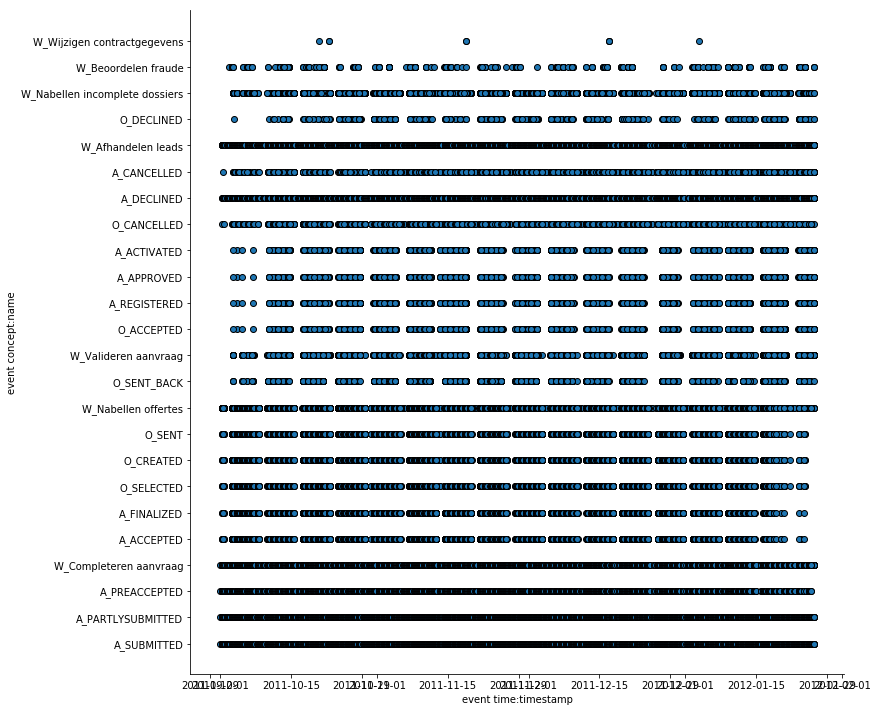

In [269]:
jp1 = sns.pairplot(final_train, x_vars= 'event time:timestamp',size = 10, y_vars= 'event concept:name', palette={"red": "#FF9999", "white": "#FFE888"},
plot_kws = dict(edgecolor="k", linewidth=1))
                  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


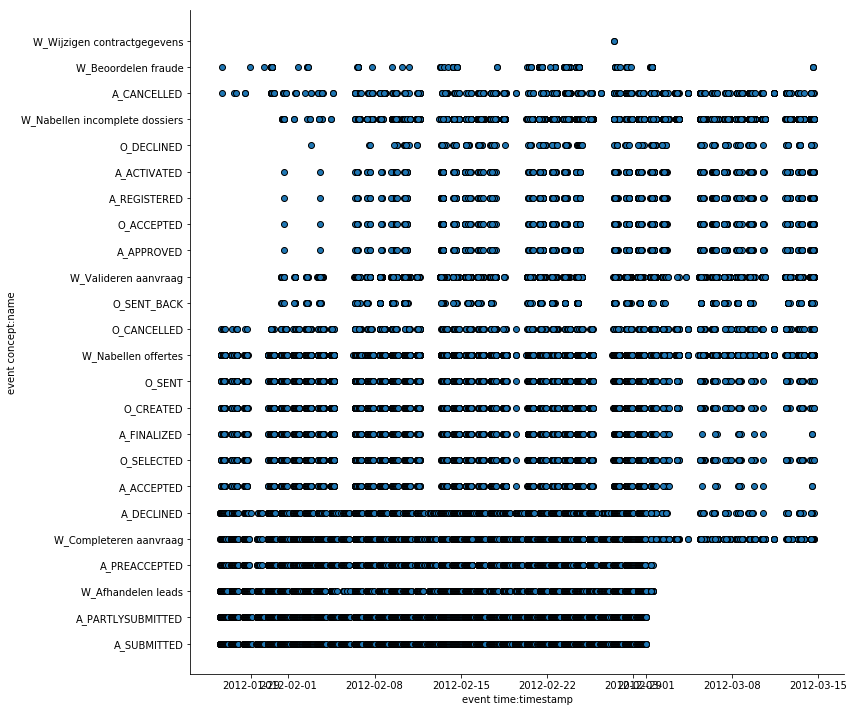

In [270]:
jp1 = sns.pairplot(final_test, x_vars= 'event time:timestamp',size = 10, y_vars= 'event concept:name', palette={"red": "#FF9999", "white": "#FFE888"},
plot_kws = dict(edgecolor="k", linewidth=1))

## Road Data Set

In [221]:
train_default_r = pd.read_csv('Road_Traffic_Fine_Management_Process-training.csv')
test_default_r = pd.read_csv('Road_Traffic_Fine_Management_Process-test.csv')


In [292]:
merged_dataset_r['event time:timestamp'] =pd.to_datetime(merged_dataset_r['event time:timestamp'])
sorted_dataset_r = merged_dataset_r.sort_values('event time:timestamp').reset_index(drop=True)
training_data =  sorted_dataset_r[0:393029]
test_data = sorted_dataset_r[393030:]
s1_r = pd.merge(train_default_r, test_default_r, how='inner', on=['case concept:name'])

training_data_mask_r = train_default_r['case concept:name'].isin(s1_r['case concept:name'])
training_data_fil_r = test_default_r[~training_data_mask_r]
#training_data_fil

test_data_mask_r = test_default_r['case concept:name'].isin(s1_r['case concept:name'])
test_data_fil_r = test_default_r[~test_data_mask_r]
#test_data_fil

s2_r = pd.merge(training_data_fil_r, test_data_fil_r, how='inner', on=['case concept:name'])

final_train_r = training_data_fil_r.sort_values(by=[ 'case concept:name','event time:timestamp'])
final_test_r = test_data_fil_r.sort_values(by=[ 'case concept:name','event time:timestamp'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [296]:
final_train_r.tail()

,eventID,case concept:name,event concept:name,event lifecycle:transition,event time:timestamp
69849,645829937332227,V9999,Add penalty,complete,03-01-2003 00:00:00.000
66186,645829937332226,V9999,Insert Fine Notification,complete,04-11-2002 00:00:00.000
61241,645829937332224,V9999,Create Fine,complete,07-09-2002 00:00:00.000
92551,645829937332228,V9999,Send for Credit Collection,complete,10-01-2004 00:00:00.000
64958,645829937332225,V9999,Send Fine,complete,25-10-2002 00:00:00.000


In [297]:
final_test_r.head()

,eventID,case concept:name,event concept:name,event lifecycle:transition,event time:timestamp
3174,516667385839616,S51143,Create Fine,complete,02-07-2000 00:00:00.000
49311,516667385839620,S51143,Send for Credit Collection,complete,10-04-2002 00:00:00.000
16291,516667385839619,S51143,Add penalty,complete,13-11-2000 00:00:00.000
10630,516667385839618,S51143,Insert Fine Notification,complete,14-09-2000 00:00:00.000
8503,516667385839617,S51143,Send Fine,complete,26-08-2000 00:00:00.000


In [300]:
s1

,eventID _x,case concept:name,event concept:name_x,event lifecycle:transition_x,event time:timestamp_x,eventID _y,event concept:name_y,event lifecycle:transition_y,event time:timestamp_y


In [17]:
training_split_r = sorted_dataset_r[0:393029]
test_split_r = sorted_dataset_r[393030:]

In [18]:
training_split_r

,eventID,case concept:name,event concept:name,event lifecycle:transition,event time:timestamp
206285,1,A1,Send Fine,complete,05-12-2006 00:00:00.000
188244,0,A1,Create Fine,complete,24-07-2006 00:00:00.000
189251,4294967296,A100,Create Fine,complete,02-08-2006 00:00:00.000
207056,4294967297,A100,Send Fine,complete,12-12-2006 00:00:00.000
213793,4294967298,A100,Insert Fine Notification,complete,15-01-2007 00:00:00.000
224272,4294967299,A100,Add penalty,complete,16-03-2007 00:00:00.000
303645,4294967300,A100,Send for Credit Collection,complete,30-03-2009 00:00:00.000
245388,8589934595,A10000,Add penalty,complete,01-10-2007 00:00:00.000
237213,8589934594,A10000,Insert Fine Notification,complete,02-08-2007 00:00:00.000
223558,8589934592,A10000,Create Fine,complete,09-03-2007 00:00:00.000


In [19]:
test_split_r

,eventID,case concept:name,event concept:name,event lifecycle:transition,event time:timestamp
391442,457796269113347,S164757,Add penalty,complete,04-08-2011 00:00:00.000
384076,457796269113346,S164757,Insert Fine Notification,complete,05-06-2011 00:00:00.000
379624,457796269113344,S164757,Create Fine,complete,06-04-2011 00:00:00.000
382335,457796269113345,S164757,Send Fine,complete,12-05-2011 00:00:00.000
435479,457796269113348,S164757,Send for Credit Collection,complete,24-04-2013 00:00:00.000
379628,457800564080640,S164758,Create Fine,complete,06-04-2011 00:00:00.000
382336,457800564080641,S164758,Send Fine,complete,12-05-2011 00:00:00.000
379603,457804859047936,S164759,Create Fine,complete,06-04-2011 00:00:00.000
392089,457804859047939,S164759,Add penalty,complete,09-08-2011 00:00:00.000
384400,457804859047938,S164759,Insert Fine Notification,complete,10-06-2011 00:00:00.000


In [20]:

sorted_data

,eventID,case concept:name,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp
0,0,173688,2011-10-01T00:38:44.546+02:00,20000,A_SUBMITTED,COMPLETE,01-10-2011 00:38:44.546
1,1,173688,2011-10-01T00:38:44.546+02:00,20000,A_PARTLYSUBMITTED,COMPLETE,01-10-2011 00:38:44.880
2,2,173688,2011-10-01T00:38:44.546+02:00,20000,A_PREACCEPTED,COMPLETE,01-10-2011 00:39:37.906
3,3,173688,2011-10-01T00:38:44.546+02:00,20000,W_Completeren aanvraag,SCHEDULE,01-10-2011 00:39:38.875
89,4,173688,2011-10-01T00:38:44.546+02:00,20000,W_Completeren aanvraag,START,01-10-2011 11:36:46.437
94,5,173688,2011-10-01T00:38:44.546+02:00,20000,A_ACCEPTED,COMPLETE,01-10-2011 11:42:43.308
98,7,173688,2011-10-01T00:38:44.546+02:00,20000,A_FINALIZED,COMPLETE,01-10-2011 11:45:09.243
99,6,173688,2011-10-01T00:38:44.546+02:00,20000,O_SELECTED,COMPLETE,01-10-2011 11:45:09.243
100,8,173688,2011-10-01T00:38:44.546+02:00,20000,O_CREATED,COMPLETE,01-10-2011 11:45:11.197
101,9,173688,2011-10-01T00:38:44.546+02:00,20000,O_SENT,COMPLETE,01-10-2011 11:45:11.380


In [21]:
merged_dataset_r

,eventID,case concept:name,event concept:name,event lifecycle:transition,event time:timestamp
0,504611412639744,S38735,Create Fine,complete,01-01-2000 00:00:00.000
1,511861317435392,S49055,Create Fine,complete,02-01-2000 00:00:00.000
2,511865612402688,S49056,Create Fine,complete,02-01-2000 00:00:00.000
3,507351601774592,S44306,Create Fine,complete,02-01-2000 00:00:00.000
4,511869907369984,S49057,Create Fine,complete,02-01-2000 00:00:00.000
5,128303558033408,N21197,Create Fine,complete,03-01-2000 00:00:00.000
6,504044476956672,S37636,Create Fine,complete,03-01-2000 00:00:00.000
7,129553393516544,N22010,Create Fine,complete,03-01-2000 00:00:00.000
8,130382322204672,N22398,Create Fine,complete,03-01-2000 00:00:00.000
9,129570573385728,N22019,Create Fine,complete,03-01-2000 00:00:00.000


In [22]:
#test_split_r.to_csv('testdataRoadcorrected.csv', index = False)
training_split_r.to_csv('trainingRoadcorrected.csv', index = False)


In [23]:


sorted_data.plot.scatter(x = 'event time:timestamp', y = 'case concept:name')

ValueError: scatter requires x column to be numeric

In [ ]:
daytime = pd.to_datetime(sorted_data['event time:timestamp'])


In [ ]:
g = sns.catplot(x = 'event time:timestamp', y = 'case concept:name', data= test_data)

In [ ]:
sorted_data.groupby(by = 'event concept:name').mean()

In [ ]:
type(sorted_data['event time:timestamp']).dtypes

In [ ]:
sorted_data['event time:timestamp'] = pd.to_datetime(sorted_data['event time:timestamp'], format='%Y%m%d', errors='ignore')

In [ ]:

g = sns.catplot(x = 'event time:timestamp', y = 'case concept:name', data= sorted_data)

In [ ]:
g = sns.catplot(x = 'event time:timestamp', y = 'case concept:name', data= sorted_data)

In [ ]:
print(plt.scatter(x ='event time:timestamp', y = 'case concept:name', data= sorted_data))


# BPI CHALLENGE 2017


In [90]:
train_default_2017 = pd.read_csv('BPI Challenge 2017-training.csv')
test_default_2017 = pd.read_csv('BPI Challenge 2017-test.csv')
merged_dataset_2017 = pd.concat([train_default_2017,test_default_2017])
merged_dataset_2017

,eventID,case LoanGoal,case ApplicationType,case concept:name,case RequestedAmount,event Action,event org:resource,event concept:name,event EventOrigin,event EventID,event lifecycle:transition,event time:timestamp
0,0,Existing loan takeover,New credit,Application_652823628,20000.0,Created,User_1,A_Create Application,Application,Application_652823628,complete,01-01-2016 10:51:15.304
1,1,Existing loan takeover,New credit,Application_652823628,20000.0,statechange,User_1,A_Submitted,Application,ApplState_1582051990,complete,01-01-2016 10:51:15.352
2,2,Existing loan takeover,New credit,Application_652823628,20000.0,Created,User_1,W_Handle leads,Workflow,Workitem_1298499574,schedule,01-01-2016 10:51:15.774
3,3,Existing loan takeover,New credit,Application_652823628,20000.0,Deleted,User_1,W_Handle leads,Workflow,Workitem_1673366067,withdraw,01-01-2016 10:52:36.392
4,4,Existing loan takeover,New credit,Application_652823628,20000.0,Created,User_1,W_Complete application,Workflow,Workitem_1493664571,schedule,01-01-2016 10:52:36.403
5,5,Existing loan takeover,New credit,Application_652823628,20000.0,statechange,User_1,A_Concept,Application,ApplState_642383566,complete,01-01-2016 10:52:36.413
6,4294967296,Home improvement,New credit,Application_1691306052,10000.0,Created,User_1,A_Create Application,Application,Application_1691306052,complete,01-01-2016 11:16:11.500
7,4294967297,Home improvement,New credit,Application_1691306052,10000.0,statechange,User_1,A_Submitted,Application,ApplState_284636842,complete,01-01-2016 11:16:11.549
8,4294967298,Home improvement,New credit,Application_1691306052,10000.0,Created,User_1,W_Handle leads,Workflow,Workitem_831373279,schedule,01-01-2016 11:16:11.740
9,4294967299,Home improvement,New credit,Application_1691306052,10000.0,Deleted,User_1,W_Handle leads,Workflow,Workitem_1299098074,withdraw,01-01-2016 11:17:31.573


In [99]:
sorted_data_2017 = merged_dataset.sort_values(by=[ 'case concept:name','event time:timestamp'])

split = int(1202267 * 70/100)
split

training_data_2017 = sorted_data[0:841586]
test_data_2017 = sorted_data[841586:]

training_data_2017


,eventID,case concept:name,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp
0,0,173688,2011-10-01T00:38:44.546+02:00,20000,A_SUBMITTED,COMPLETE,01-10-2011 00:38:44.546
1,1,173688,2011-10-01T00:38:44.546+02:00,20000,A_PARTLYSUBMITTED,COMPLETE,01-10-2011 00:38:44.880
2,2,173688,2011-10-01T00:38:44.546+02:00,20000,A_PREACCEPTED,COMPLETE,01-10-2011 00:39:37.906
3,3,173688,2011-10-01T00:38:44.546+02:00,20000,W_Completeren aanvraag,SCHEDULE,01-10-2011 00:39:38.875
89,4,173688,2011-10-01T00:38:44.546+02:00,20000,W_Completeren aanvraag,START,01-10-2011 11:36:46.437
94,5,173688,2011-10-01T00:38:44.546+02:00,20000,A_ACCEPTED,COMPLETE,01-10-2011 11:42:43.308
98,7,173688,2011-10-01T00:38:44.546+02:00,20000,A_FINALIZED,COMPLETE,01-10-2011 11:45:09.243
99,6,173688,2011-10-01T00:38:44.546+02:00,20000,O_SELECTED,COMPLETE,01-10-2011 11:45:09.243
100,8,173688,2011-10-01T00:38:44.546+02:00,20000,O_CREATED,COMPLETE,01-10-2011 11:45:11.197
101,9,173688,2011-10-01T00:38:44.546+02:00,20000,O_SENT,COMPLETE,01-10-2011 11:45:11.380


In [98]:
test_data_2017.head()

,eventID,case concept:name,case REG_DATE,case AMOUNT_REQ,event concept:name,event lifecycle:transition,event time:timestamp


In [89]:
sorted_data_2017

,eventID,case LoanGoal,case ApplicationType,case concept:name,case RequestedAmount,event Action,event org:resource,event concept:name,event EventOrigin,event EventID,event lifecycle:transition,event time:timestamp
651461,75999446302720,"Other, see explanation",New credit,Application_1000086665,5000.0,Created,User_1,A_Create Application,Application,Application_1000086665,complete,03-08-2016 17:57:21.673
651462,75999446302721,"Other, see explanation",New credit,Application_1000086665,5000.0,statechange,User_1,A_Submitted,Application,ApplState_161925113,complete,03-08-2016 17:57:21.734
651463,75999446302722,"Other, see explanation",New credit,Application_1000086665,5000.0,Created,User_1,W_Handle leads,Workflow,Workitem_747707399,schedule,03-08-2016 17:57:21.963
651465,75999446302723,"Other, see explanation",New credit,Application_1000086665,5000.0,Deleted,User_1,W_Handle leads,Workflow,Workitem_1030261128,withdraw,03-08-2016 17:58:28.286
651466,75999446302724,"Other, see explanation",New credit,Application_1000086665,5000.0,Created,User_1,W_Complete application,Workflow,Workitem_1127124826,schedule,03-08-2016 17:58:28.293
651467,75999446302725,"Other, see explanation",New credit,Application_1000086665,5000.0,statechange,User_1,A_Concept,Application,ApplState_385184570,complete,03-08-2016 17:58:28.299
655571,75999446302726,"Other, see explanation",New credit,Application_1000086665,5000.0,Obtained,User_14,W_Complete application,Workflow,Workitem_518019192,start,04-08-2016 15:39:29.557
655667,75999446302727,"Other, see explanation",New credit,Application_1000086665,5000.0,Released,User_14,W_Complete application,Workflow,Workitem_1967765821,suspend,04-08-2016 15:50:12.281
660081,75999446302728,"Other, see explanation",New credit,Application_1000086665,5000.0,statechange,User_5,A_Accepted,Application,ApplState_856156982,complete,05-08-2016 15:57:07.419
660100,75999446302729,"Other, see explanation",New credit,Application_1000086665,5000.0,Created,User_5,O_Create Offer,Offer,Offer_410892064,complete,05-08-2016 15:59:57.320
